In [18]:
from simpleabc import simple_abc
import simple_model
import numpy as np
import pickle 
import pylab as plt
from scipy import stats
import time
%matplotlib inline
plt.style.use('ggplot')

In [30]:
reload(simple_model)

<module 'simple_model' from 'simple_model.py'>

In [31]:
np.random.seed(914)

steps = 3
eps = 0.25
min_part = 10

#stars = pickle.load(file('stars.pkl'))
stars = pickle.load(file('stars_trimmed.pkl'))
#obs = pickle.load(file('data.pkl'))

model = simple_model.MyModel(stars)

#theta = (mututal inclination, eccentricity, planet number)

model.set_prior([stats.uniform(0, 90.0),
                stats.uniform(0,20)])



theta = (2.0,10)
obs = model.generate_data(theta)
model.set_data(obs)





n_procs = [1, 2, 3, 4, 5, 6, 7, 8]

start = time.time()
OT = simple_abc.pmc_abc(model, obs, epsilon_0=eps, min_particles=min_part, steps=steps,
                        target_epsilon=eps, parallel=False)
end = time.time()
print 'Serial took {}s'.format(end - start)
out_pickle = file('simptest.pkl', 'w')
pickle.dump(OT, out_pickle)
out_pickle.close()

<type 'tuple'>
0 0.25
1 0.0903982622764
Effective sample size(s): [[ 11.  11.]]
2 0.0790279005374
Effective sample size(s): [[ 11.   7.]]
Serial took 102.543305874s


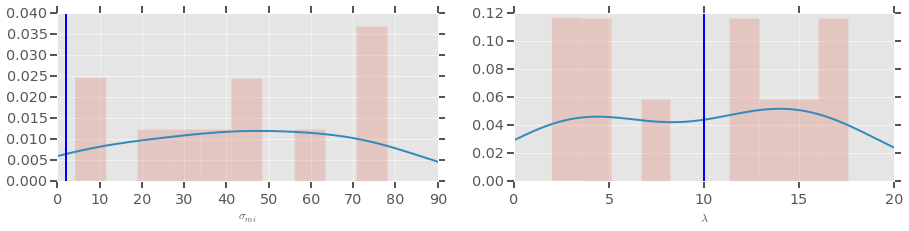

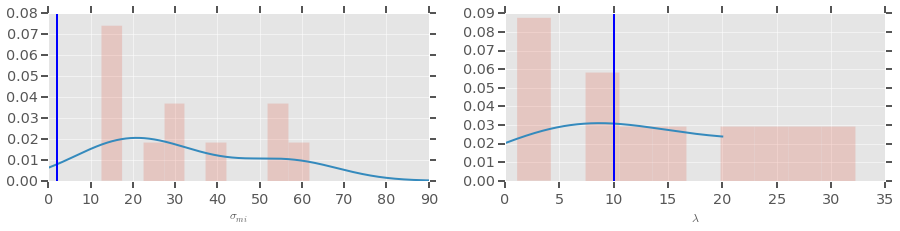

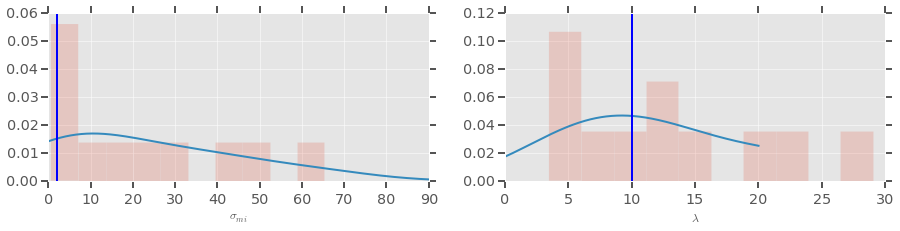

In [32]:
for P in OT:
    P[0] = P[0].T
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    ker = stats.gaussian_kde([x[0] for x in P[0]])
    plt.hist([x[0] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,90,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[0])
    plt.xlabel(r"$\sigma_{mi}$")
    plt.subplot(122)
    ker = stats.gaussian_kde([x[1] for x in P[0]])
    plt.hist([x[1] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0,20,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[1])
    plt.xlabel(r"$\lambda$")
 


In [2]:
DT = pickle.load(file('demo.pkl'))

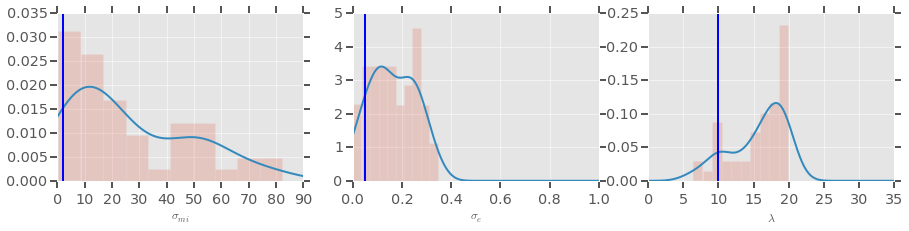

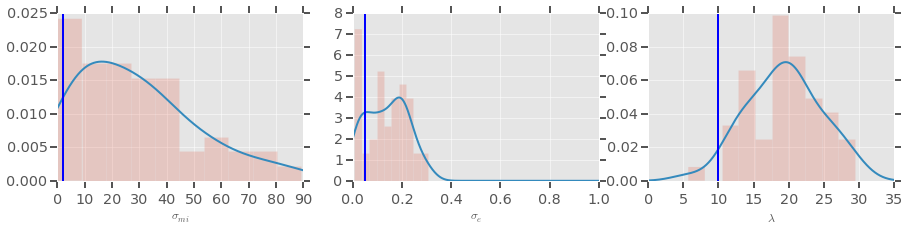

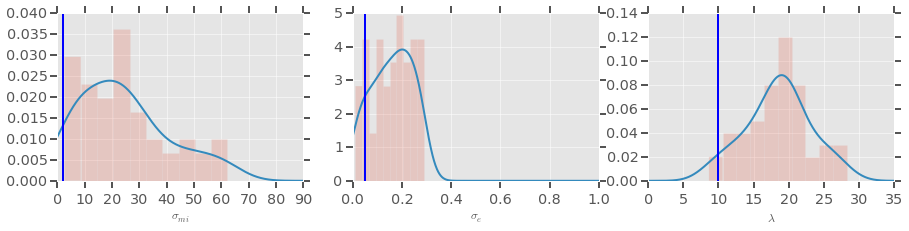

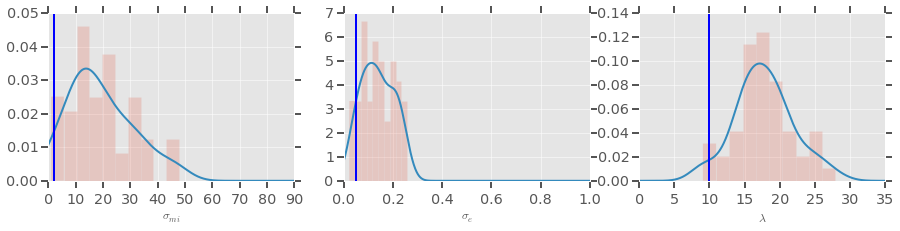

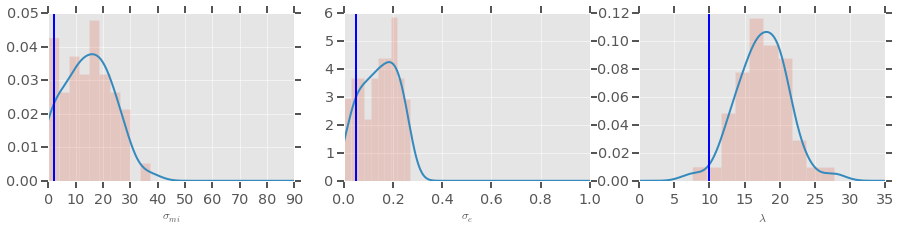

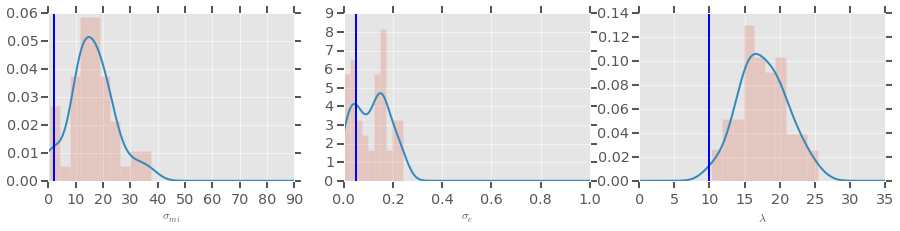

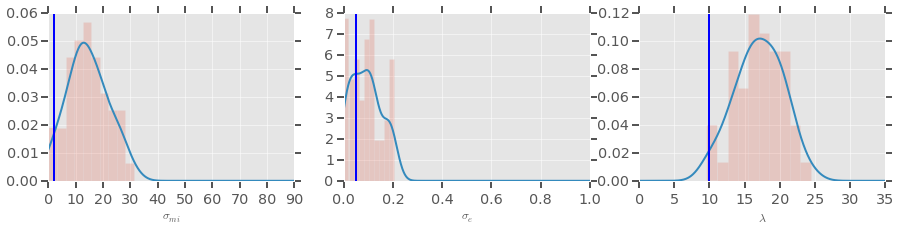

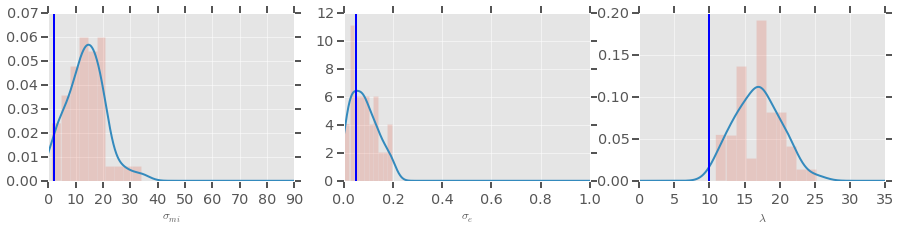

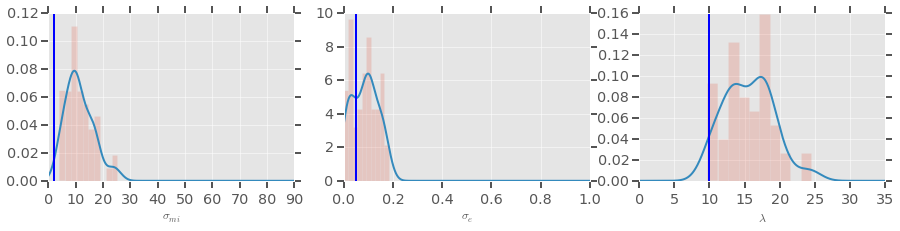

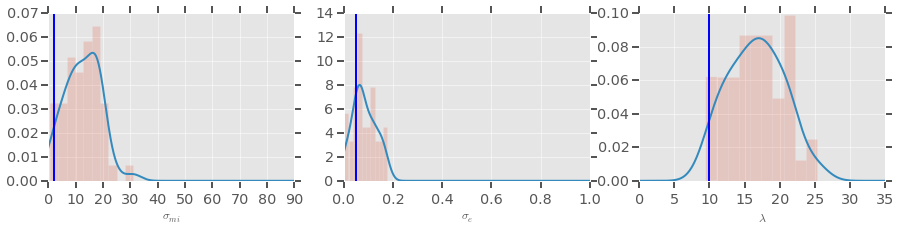

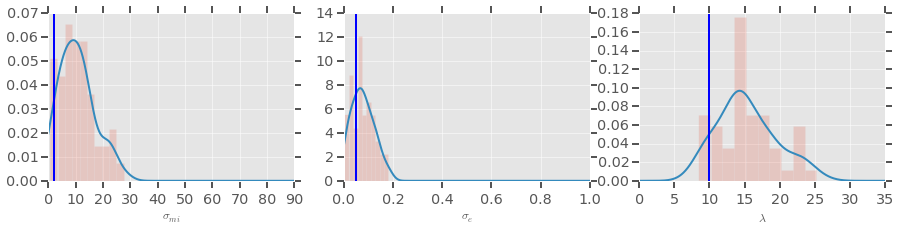

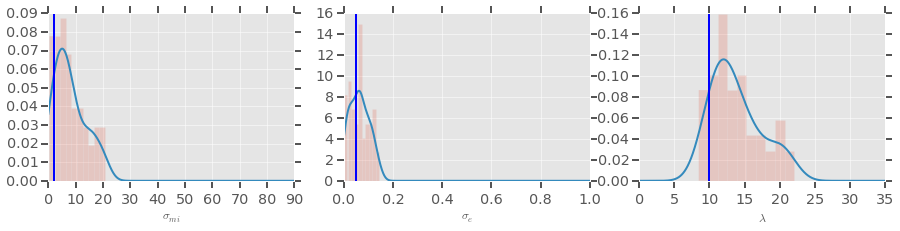

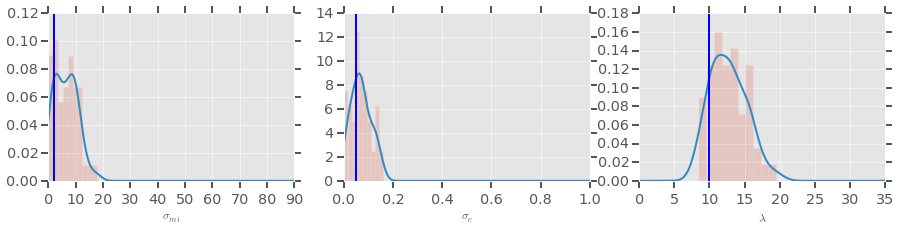

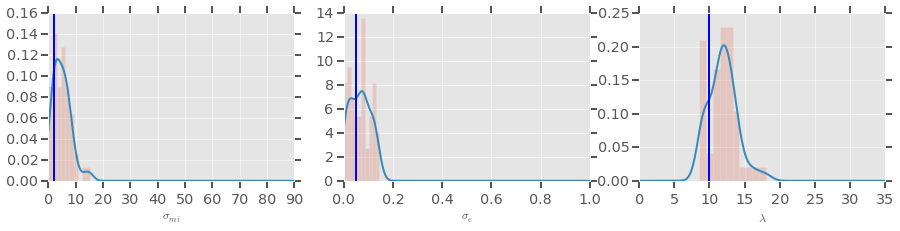

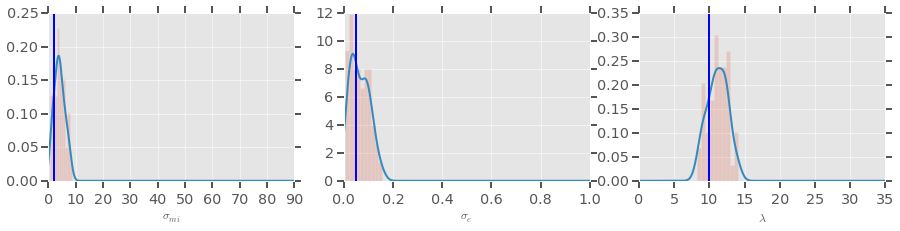

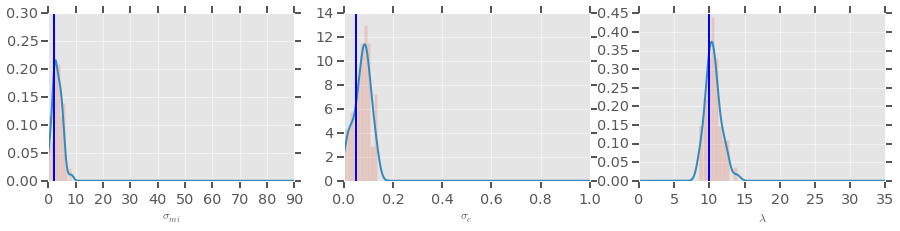

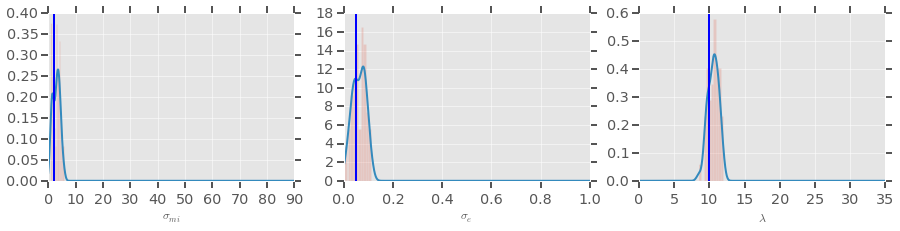

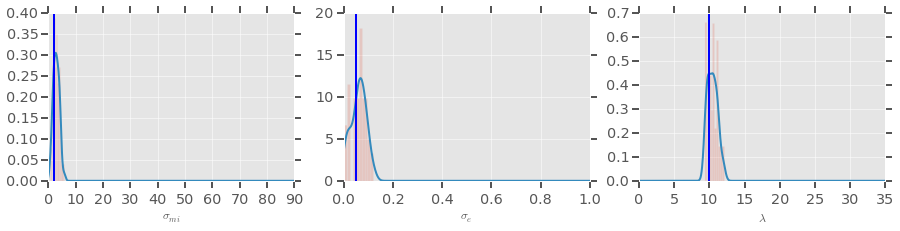

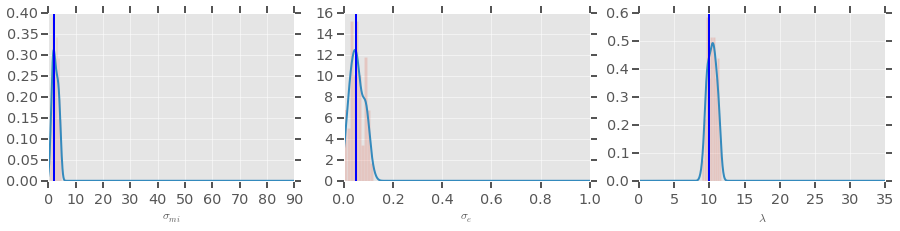

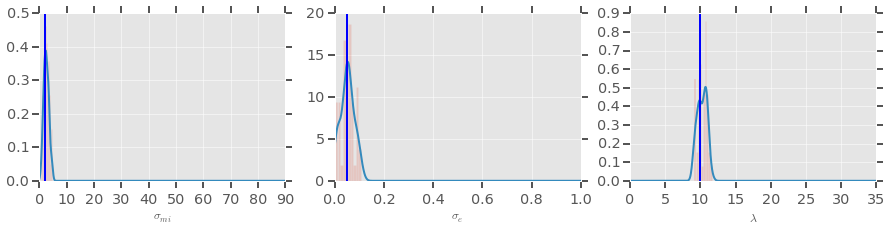

In [3]:
thetad = (2.0, 0.05, 10)
for P in DT:
    plt.figure(figsize=(15,3))
    plt.subplot(131)
    ker = stats.gaussian_kde([x[0] for x in P[0]])
    plt.hist([x[0] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,90,1000)
    plt.plot(x,ker(x))
    plt.axvline(thetad[0])
    plt.xlabel(r"$\sigma_{mi}$")
    plt.subplot(132)
    ker = stats.gaussian_kde([x[1] for x in P[0]])
    plt.hist([x[1] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,1.0,1000)
    plt.plot(x,ker(x))
    plt.axvline(thetad[1])
    plt.xlabel(r"$\sigma_{e}$")
    plt.subplot(133)
    ker = stats.gaussian_kde([x[2] for x in P[0]])
    plt.hist([x[2] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0,35,1000)
    plt.plot(x,ker(x))
    plt.axvline(thetad[2])
    plt.xlabel(r"$\lambda$")

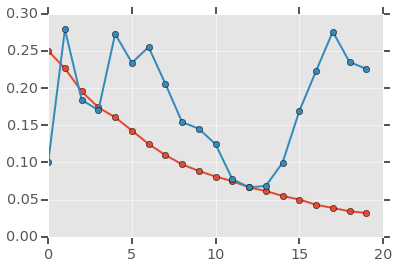

In [5]:
epsilon = [DT[i][4] for i in range(0,20)]
plt.plot(range(0,20),epsilon, 'o-')
accept = [DT[i][2]/float(DT[i][3]) for i in range(0,20)]
plt.plot(range(0,20),accept, 'o-')


([[39.81183953660224, 0.17249596105402232, 14.61474273766613], [39.6598740454627, 0.18772377679374885, 10.016040614078442], [47.483679253949674, 0.18334077497836965, 7.864872626610342], [78.31508908045609, 0.03199776353614603, 9.36693274906407], [83.365683518924, 0.11020693940364323, 17.008628237965787], [11.285233349332128, 0.26787275344339523, 14.358438776632887], [22.8802079826819, 0.1869143076490163, 17.178789955116407], [47.231436130154556, 0.1882786288254532, 6.700995187095957], [39.43517466492983, 0.2676446498218684, 19.390263413399822], [48.628469834246644, 0.313236615412126, 15.808245170373008], [29.877438489361207, 0.3107168821809947, 6.27956095718039], [38.886712951081435, 0.33235183238971155, 15.323385713107477], [81.2959354088329, 0.1553327623075893, 19.86082643267811], [19.706581919177015, 0.1941846628711823, 9.992025496564397], [84.8796752204316, 0.12497365746940303, 11.77710022377886], [73.0198351379791, 0.10000703775606257, 18.969379774716508], [53.371373371323145, 0.1